# Linear Models (Advanced)

မင်္ဂလာပါ။ Data Science Using Python Week 14 က ကြိုဆိုပါတယ်။ 

ဒီတပါတ်မှာ linear model တွေအကြောင်းကို အသေးစိတ် ပြောမှာ ဖြစ်ပါတယ်။

## Review of Linear Regression

### Recipe 10 - Linear Regression

**Regression**: ဆိုတာ ဂဏန်းတန်ဖိုးတခုကို တွက်နည်းကို မသိပဲ အရင်က အဖြေတွေကို သိထားတဲ့အခါကျရင် နောက် unseen အဖြေတွေကို ခန့်မှန်း/တွက်ချက်ပေးမဲ့ function (Model) ကို တည်ဆောက်ခြင်းပါ။

> လိုတာတွေကတော့ အရင်က $X$ (features/independent variables) နဲ့ အဖြေ $y$ (target/dependent variable) တွေပဲ။

> validation/test dataset ကို သပ်သပ်ဖယ်ထားလေ့ရှိတယ်။

```python
from sklearn import linear_model as sk_lm

# initializing the model;
linear_regression_model = sk_lm.LinearRegression()
# building the model; 
linear_regression_model.fit(X, y)
# using the model for unseen values
y_pred = linear_regression_model.predict(X_unseen)
```

---

### Recipe 11 - Assessing Regression Results

**Regression Results** ကောင်း/မကောင်းကို known answers တွေနဲ့ ယှဉ်ကြည့်ဖို့ `sklearn.metrics` ကို သုံးနိုင်တယ်။

> ဒါကြောင့် validation/test dataset ကို သပ်သပ်ဖယ်ထားရတာ။

```python
from sklearn import metrics as sk_met

print ("max error : ") # the lesser, the better
print (sk_met.max_error(y_bst_ts, y_bst_pred))
print ("mean absolute error") # the lesser, the better
print (sk_met.mean_absolute_error(y_bst_ts, y_bst_pred))
print ("median absolute error") # the lesser, the better
print (sk_met.median_absolute_error(y_bst_ts, y_bst_pred))
print ("mean square error : ") # the lesser, the better
print (sk_met.mean_squared_error(y_bst_ts, y_bst_pred))
print ("r^2 score : ") # the bigger (closer to 1), the better
print (sk_met.r2_score(y_bst_ts, y_bst_pred))
```

---

### Recipe 12 - Comparing Regression Features

တခါတလေမှာ feature $f_i$ နဲ့ $f_j$ တို့ကို နှိုင်းယှဉ်ဖို့ လိုတဲ့အခါ ... F-score နဲ့ p-value တို့ကို သုံးရတယ်။

```python
from sklearn import feature_selection as sk_fs
selector = sk_fs.SelectKBest(sk_fs.f_regression, k="all")
selector.fit(X["feature_1", "feature_2"], y)
print (selector.scores_)
print (selector.pvalues_)
```

> **p-value** က 0.05 ထက်ကြီးရင် တွဲလျက် F-score က မတော်တဆ ရလာတာဖြစ်တယ် (သုံးမရဘူး)။ 

သုံးရတဲ့ **F-score** တွေက ကြီးလေ ကောင်းလေပဲ။

---

## Inner-workings of Linear Regression

In [17]:
import numpy as np
from scipy import linalg as sp_linalg

import pandas as pd
from sklearn import datasets, metrics, linear_model, model_selection as ms

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
import importlib
import utils
importlib.reload(utils)

np.random.seed(42)

In [4]:
df_X, ds_y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
N = len(ds_y)
k_select_every = 50
selected_col = "MedInc"

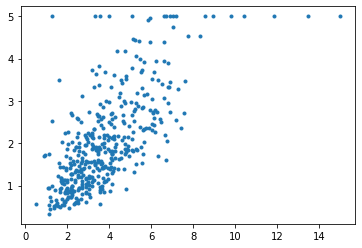

In [6]:
selector = range(0, N, k_select_every)
selected_X = df_X[selected_col][selector]
selected_y = ds_y[selector]
utils.scatter_xy(selected_X, y=selected_y, xlabel=selected_col)

In [8]:
model = linear_model.LinearRegression()
model.fit(selected_X.values.reshape((-1, 1)), selected_y)
model.coef_, model.intercept_

(array([0.42511566]), 0.41172495663170916)

**အဲဒီ အပေါ်က ဂဏန်း ၂ လုံး ဘယ်က ရလာသလဲ**

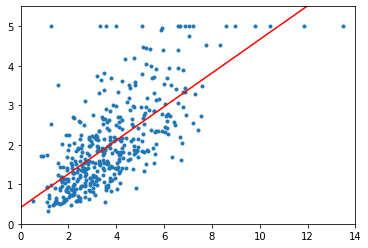

In [10]:
utils.scatter_xy(selected_X, y=selected_y, xlabel=selected_col)
utils.draw_line(model.coef_[0], model.intercept_, ylim=(0, 5.5))
plt.show()

လိုင်း အနီဟာ ဂဏန်း ၂ လုံးကို ကိုယ်စားပြုတယ်။ `model` ရဲ့ `predict` function ဟာ အောက်ပါ function နဲ့ တူတူပဲ ဖြစ်တယ်။

```python
def predict(x, coef_=model.coef_[0], intercept_=model.intercept_):
    return x * coef_ + intercept_
```

In [20]:
def predict(x, coef_=model.coef_[0], intercept_=model.intercept_):
    return x * coef_ + intercept_
predict(selected_X)

0        3.950898
50       0.803597
100      1.470773
150      2.142796
200      1.697997
           ...   
20400    2.504739
20450    2.631084
20500    3.040003
20550    1.638779
20600    1.730816
Name: MedInc, Length: 413, dtype: float64

In [22]:
# fix this error
temp_df = pd.DataFrame({
    selected_col : selected_X, 
    "predict_function" : predict(selected_X),
    "model_predict_function" : model.predict(selected_X.values.reshape((-1, 1))),
})
temp_df

,MedInc,predict_function,model_predict_function
0,8.3252,3.950898,3.950898
50,0.9218,0.803597,0.803597
100,2.4912,1.470773,1.470773
150,4.0720,2.142796,2.142796
200,3.0257,1.697997,1.697997
...,...,...,...
20400,4.9234,2.504739,2.504739
20450,5.2206,2.631084,2.631084
20500,6.1825,3.040003,3.040003
20550,2.8864,1.638779,1.638779


အဖြစ်မှန်နဲ့ `model` output နဲ့ ကွာခြားချက်ကို သိစေဖို့ `error` ကို `predict_function` ထဲက `selected_y` ကို နှုတ်ပြီး ရှာကြည့်ကြမယ်။ 

ပြီးတော့ အဲဒီ `error` ကို အမြဲ အပေါင်းကိန်းဖြစ်စေဖို့ ၂ ထပ် တင်လိုက်မယ်။

In [31]:
temp_df["error"] = temp_df["predict_function"] - selected_y
temp_df["square_error"] = temp_df["error"].values ** 2
temp_df

,MedInc,predict_function,model_predict_function,error,square_error
0,8.3252,3.950898,3.950898,-0.575102,0.330742
50,0.9218,0.803597,0.803597,-0.915403,0.837963
100,2.4912,1.470773,1.470773,-1.107227,1.225951
150,4.0720,2.142796,2.142796,-0.558204,0.311592
200,3.0257,1.697997,1.697997,0.889997,0.792095
...,...,...,...,...,...
20400,4.9234,2.504739,2.504739,0.090739,0.008234
20450,5.2206,2.631084,2.631084,-0.170916,0.029212
20500,6.1825,3.040003,3.040003,0.770003,0.592904
20550,2.8864,1.638779,1.638779,0.607779,0.369395


In [32]:
def calculate_sum_square_error(predict, actual):
    return np.sum((predict - actual) ** 2)

calculate_sum_square_error(temp_df["predict_function"], selected_y)

270.67898459248806

In [29]:
temp_df.drop("square_error_2", axis=1, inplace=True)